# Порівняння продуктивності структур дерев

У цьому ноутбуці ми порівняємо продуктивність різних структур дерев:
- Дерево AVL
- B-дерево
- Червоно-чорне дерево
- Splay Tree
- 2-3 дерево

Ми проаналізуємо їх продуктивність для різних операцій, включаючи вставку, пошук, видалення та обходи з різними розмірами даних.

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tree_factory import TreeFactory
from tree_sql import TreeSQL

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

## Функції вимірювання продуктивності

Визначимо функції для вимірювання продуктивності різних операцій для кожної реалізації дерева.

In [2]:
def measure_insertion_time(tree_type, data):
    tree = TreeFactory.create_tree(tree_type)
    
    start_time = time.time()
    for item in data:
        tree.insert(item)
    end_time = time.time()
    
    return end_time - start_time

def measure_search_time(tree_type, data_to_insert, data_to_search):
    tree = TreeFactory.create_tree(tree_type)
    
    for item in data_to_insert:
        tree.insert(item)
    
    start_time = time.perf_counter()
    for item in data_to_search:
        tree.search(item)
    end_time = time.perf_counter()
    
    return end_time - start_time

def measure_deletion_time(tree_type, data_to_insert, data_to_delete):
    tree = TreeFactory.create_tree(tree_type)
    
    for item in data_to_insert:
        tree.insert(item)
    
    start_time = time.time()
    for item in data_to_delete:
        tree.delete(item)
    end_time = time.time()
    
    return end_time - start_time

def measure_traversal_time(tree_type, data, traversal_type):
    tree = TreeFactory.create_tree(tree_type)
    
    for item in data:
        tree.insert(item)
    
    start_time = time.time()
    
    if traversal_type == 'inorder':
        result = tree.inorder_traversal()
    else:
        result = tree.preorder_traversal()
    
    end_time = time.time()
    
    return end_time - start_time, result

## Налаштування експерименту

Спочатку налаштуємо параметри нашого експерименту. Ми перевіримо дерева з різною кількістю елементів.

In [3]:
sizes = [100, 500, 1000, 5000, 10000, 20000]

tree_types = [
    ("avl", "AVL Tree"),
    ("b-tree", "B-Tree"),
    ("red-black", "Червоно-чорне дерево"),
    ("splay", "splay-дерево"),
    ("2-3-tree", "2-3 дерево")
]

insertion_results = {}
search_results = {}
deletion_results = {}
inorder_results = {}
preorder_results = {}

## Продуктивність вставки

Виміряємо час, необхідний для кожного дерева для вставки різної кількості елементів.

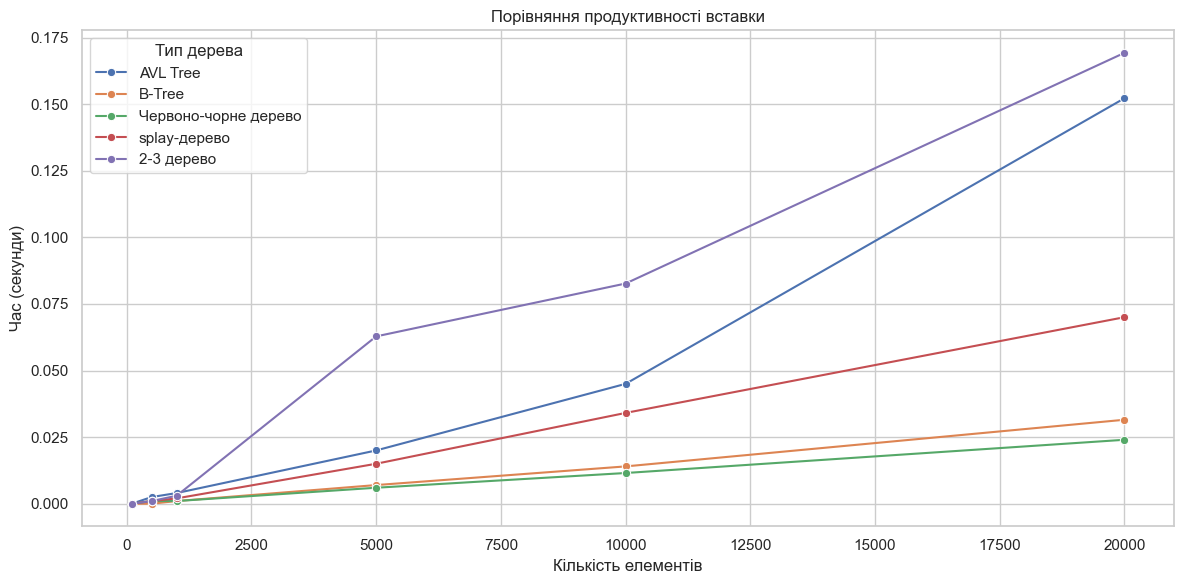

In [4]:
for size in sizes:
    data = random.sample(range(1, size*10), size)
    
    for tree_type, name in tree_types:
        time_taken = measure_insertion_time(tree_type, data)
        
        if name not in insertion_results:
            insertion_results[name] = {}
        insertion_results[name][size] = time_taken

insertion_df = pd.DataFrame(insertion_results)
insertion_df.index.name = 'Розмір'
insertion_df.reset_index(inplace=True)

insertion_melted = pd.melt(insertion_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Час (с)')

plt.figure(figsize=(12, 6))
sns.lineplot(data=insertion_melted, x='Розмір', y='Час (с)', hue='Тип дерева', marker='o')
plt.title('Порівняння продуктивності вставки')
plt.xlabel('Кількість елементів')
plt.ylabel('Час (секунди)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Продуктивність пошуку

Зараз виміряємо продуктивність пошуку для кожної реалізації дерева.

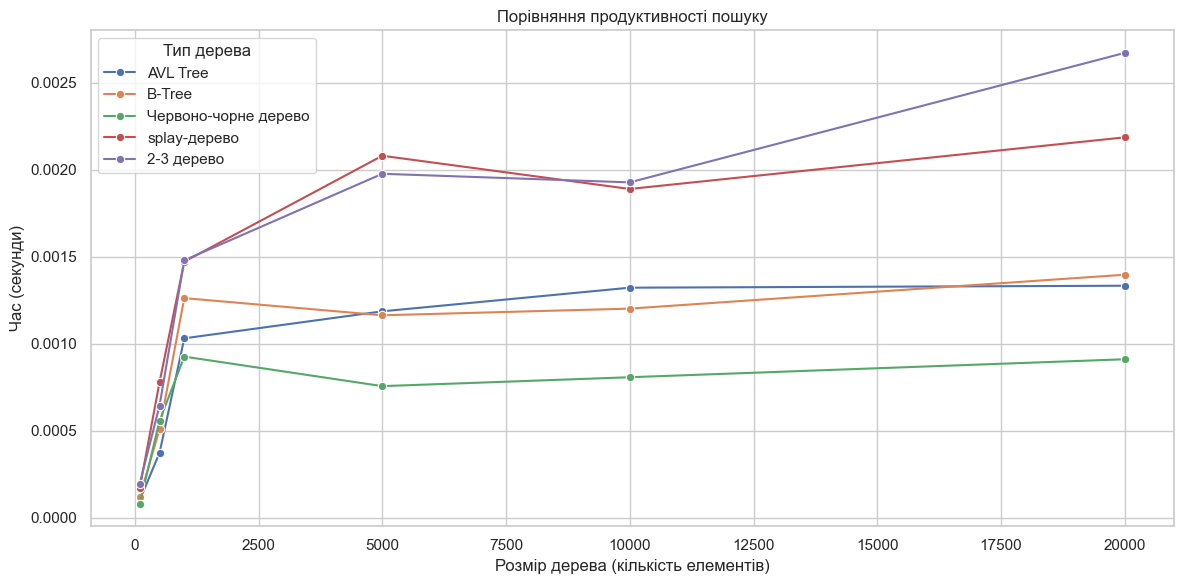

In [5]:
for size in sizes:
    data_to_insert = random.sample(range(1, size*10), size)
    
    search_size = min(1000, size)
    existing_data = random.sample(data_to_insert, search_size // 2)
    non_existing_data = random.sample([x for x in range(1, size*10) if x not in data_to_insert], search_size // 2)
    data_to_search = existing_data + non_existing_data
    random.shuffle(data_to_search)
    
    for tree_type, name in tree_types:
        time_taken = measure_search_time(tree_type, data_to_insert, data_to_search)
        
        if name not in search_results:
            search_results[name] = {}
        search_results[name][size] = time_taken

search_df = pd.DataFrame(search_results)
search_df.index.name = 'Розмір'
search_df.reset_index(inplace=True)

search_melted = pd.melt(search_df, id_vars=['Розмір'], var_name='Тип дерева', value_name='Час (с)')

plt.figure(figsize=(12, 6))
sns.lineplot(data=search_melted, x='Розмір', y='Час (с)', hue='Тип дерева', marker='o')
plt.title('Порівняння продуктивності пошуку')
plt.xlabel('Розмір дерева (кількість елементів)')
plt.ylabel('Час (секунди)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Продуктивність обходу

Виміряємо продуктивність обходу для кожної реалізації дерева (в-порядку та перед-порядком).

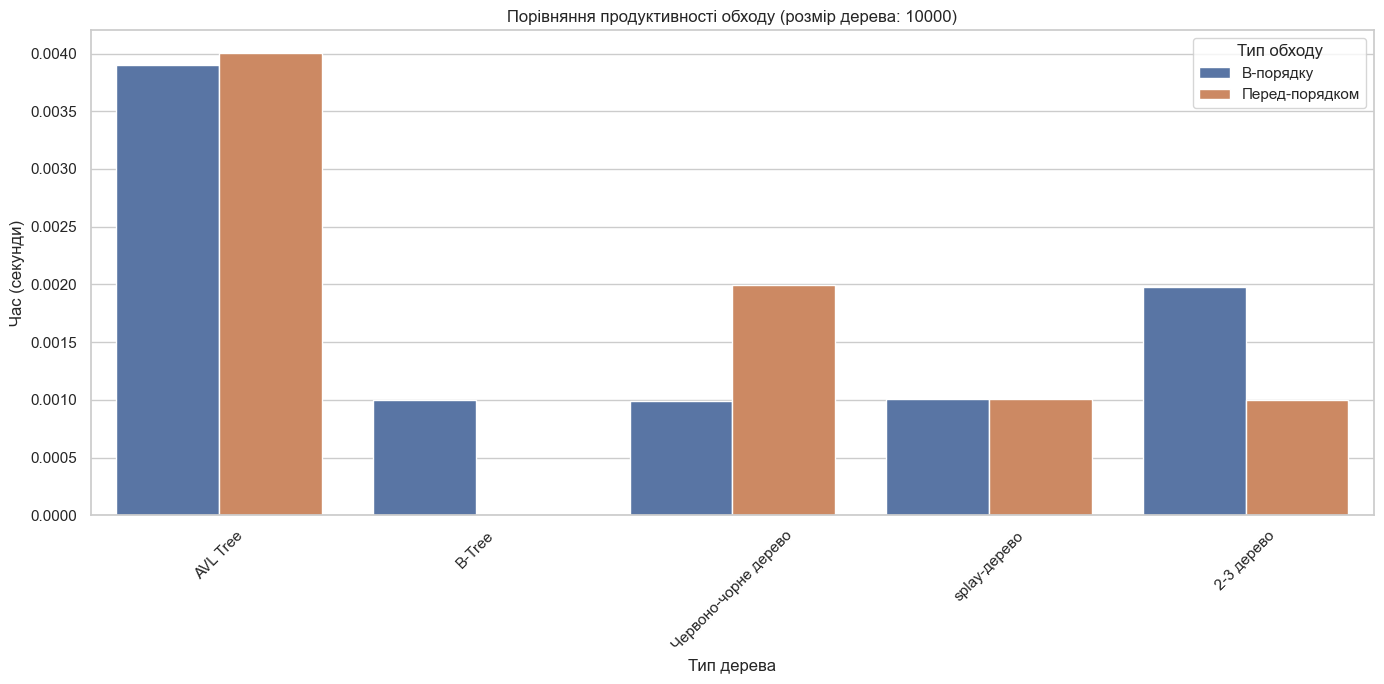

In [7]:

fixed_size = 10000
test_data = random.sample(range(1, fixed_size*10), fixed_size)

inorder_results = {}
preorder_results = {}

for tree_type, name in tree_types:
    time_taken, _ = measure_traversal_time(tree_type, test_data, 'inorder')
    inorder_results[name] = time_taken
    
    time_taken, _ = measure_traversal_time(tree_type, test_data, 'preorder')
    preorder_results[name] = time_taken

traversal_df = pd.DataFrame({
    'Тип дерева': list(inorder_results.keys()) + list(preorder_results.keys()),
    'Час (с)': list(inorder_results.values()) + list(preorder_results.values()),
    'Тип обходу': ['В-порядку'] * len(inorder_results) + ['Перед-порядком'] * len(preorder_results)
})

plt.figure(figsize=(14, 7))
sns.barplot(data=traversal_df, x='Тип дерева', y='Час (с)', hue='Тип обходу')
plt.title(f'Порівняння продуктивності обходу (розмір дерева: {fixed_size})')
plt.xlabel('Тип дерева')
plt.ylabel('Час (секунди)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Комбінований аналіз

Створимо комбіновану візуалізацію для порівняння всіх типів дерев за всіма операціями.

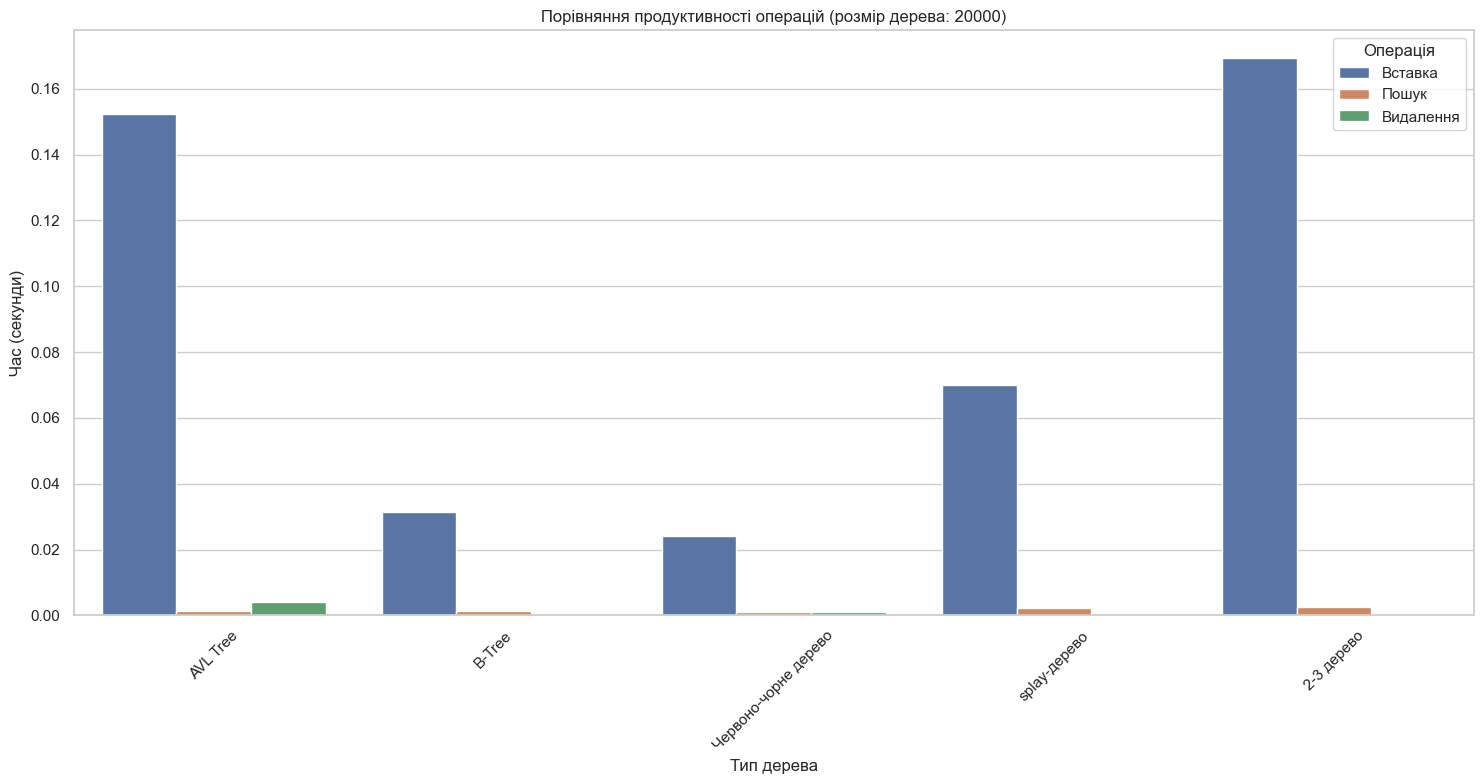

In [8]:
largest_size = max(sizes)

operations_df = pd.DataFrame({
    'Тип дерева': [],
    'Операція': [],
    'Час (с)': []
})

for tree_type, data in insertion_results.items():
    if largest_size in data:
        operations_df = pd.concat([operations_df, pd.DataFrame({
            'Тип дерева': [tree_type],
            'Операція': ['Вставка'],
            'Час (с)': [data[largest_size]]
        })], ignore_index=True)

for tree_type, data in search_results.items():
    if largest_size in data:
        operations_df = pd.concat([operations_df, pd.DataFrame({
            'Тип дерева': [tree_type],
            'Операція': ['Пошук'],
            'Час (с)': [data[largest_size]]
        })], ignore_index=True)

for tree_type, data in deletion_results.items():
    if largest_size in data and not np.isnan(data[largest_size]):
        operations_df = pd.concat([operations_df, pd.DataFrame({
            'Тип дерева': [tree_type],
            'Операція': ['Видалення'],
            'Час (с)': [data[largest_size]]
        })], ignore_index=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=operations_df, x='Тип дерева', y='Час (с)', hue='Операція')
plt.title(f'Порівняння продуктивності операцій (розмір дерева: {largest_size})')
plt.xlabel('Тип дерева')
plt.ylabel('Час (секунди)')
plt.xticks(rotation=45)
plt.legend(title='Операція', loc='upper right')
plt.tight_layout()
plt.show()

## Демонстрація SQL-інтерфейсу з різними структурами дерев

Виконання: CREATE DATABASE test_db
Результат: None
Час виконання: 0.001505 сек
---
Виконання: USE test_db
Результат: None
Час виконання: 0.000000 сек
---
Виконання: CREATE TABLE users ( id , name , age ) USING avl
Фіксована команда: CREATE TABLE users ( id , name , age ) USING avl
Результат: None
Час виконання: 0.001007 сек
---
Виконання: INSERT INTO users VALUES ( 1 , 'Олег' , 25 )
Фіксована команда: INSERT INTO users VALUES ( 1 , 'Олег' , 25 ) 
Результат: None
Час виконання: 0.001007 сек
---
Виконання: INSERT INTO users VALUES ( 2 , 'Марія' , 30 )
Фіксована команда: INSERT INTO users VALUES ( 2 , 'Марія' , 30 ) 
Результат: None
Час виконання: 0.000999 сек
---
Виконання: INSERT INTO users VALUES ( 3 , 'Іван' , 22 )
Фіксована команда: INSERT INTO users VALUES ( 3 , 'Іван' , 22 ) 
Результат: None
Час виконання: 0.000997 сек
---
Виконання: INSERT INTO users VALUES ( 4 , 'Оксана' , 28 )
Фіксована команда: INSERT INTO users VALUES ( 4 , 'Оксана' , 28 ) 
Результат: None
Час виконання: 0.000

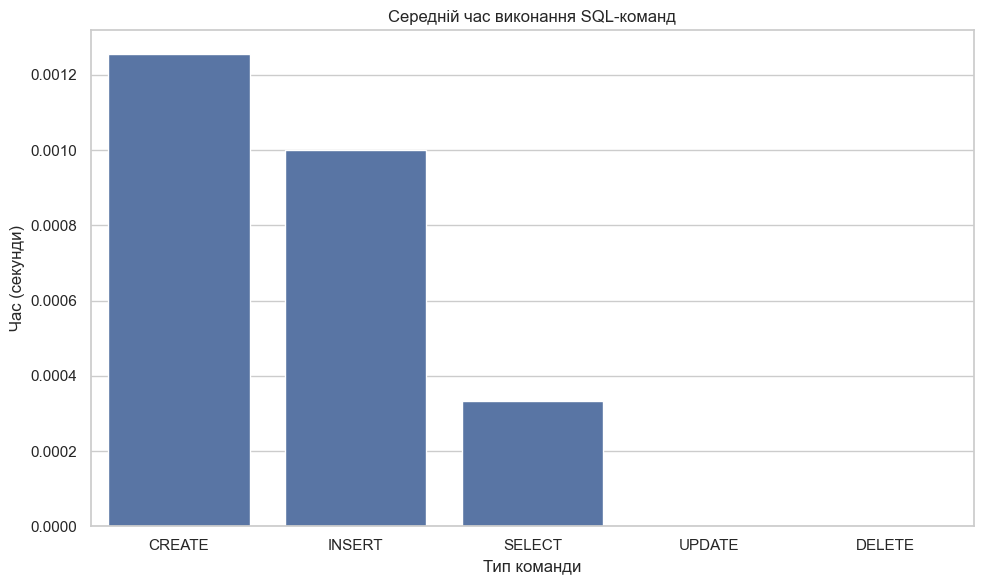

In [9]:
sql = TreeSQL()

commands = [
    "CREATE DATABASE test_db",
    "USE test_db",
    "CREATE TABLE users ( id , name , age ) USING avl",
    "INSERT INTO users VALUES ( 1 , 'Олег' , 25 )",
    "INSERT INTO users VALUES ( 2 , 'Марія' , 30 )",
    "INSERT INTO users VALUES ( 3 , 'Іван' , 22 )",
    "INSERT INTO users VALUES ( 4 , 'Оксана' , 28 )",
    "SELECT * FROM users",
    "SELECT * FROM users WHERE id = 2",
    "UPDATE users SET age = 26 WHERE id = 1",
    "SELECT * FROM users WHERE id = 1",
    "DELETE FROM users WHERE id = 3",
    "SELECT * FROM users"
]

def fix_sql_command(command):
    fixed_cmd = command
    for char in "(),=":
        fixed_cmd = fixed_cmd.replace(char, f" {char} ")
    
    while "  " in fixed_cmd:
        fixed_cmd = fixed_cmd.replace("  ", " ")
    
    return fixed_cmd

try:
    sql = TreeSQL()
    
    results = {}
    execution_times = {}
    
    for command in commands:
        try:
            print(f"Виконання: {command}")
            
            if any(char in command for char in "(),="):
                fixed_command = fix_sql_command(command)
                print(f"Фіксована команда: {fixed_command}")
                command_to_execute = fixed_command
            else:
                command_to_execute = command
                
            start_time = time.time()
            result = sql.parse_command(command_to_execute)
            end_time = time.time()
            
            results[command] = result
            execution_times[command] = end_time - start_time
            
            print(f"Результат: {result}")
            print(f"Час виконання: {execution_times[command]:.6f} сек")
            print("---")
        except Exception as e:
            print(f"Помилка при виконанні команди: {command}")
            print(f"Тип помилки: {type(e).__name__}: {e}")
            print("---")

    cmd_types = {
        "CREATE": [],
        "INSERT": [],
        "SELECT": [],
        "UPDATE": [],
        "DELETE": []
    }
    
    for cmd, exec_time in execution_times.items():
        cmd_type = cmd.split()[0].upper()
        if cmd_type in cmd_types:
            cmd_types[cmd_type].append(exec_time)
    
    cmd_data = []
    for cmd_type, times in cmd_types.items():
        if times:
            cmd_data.append({
                'Тип команди': cmd_type,
                'Середній час (с)': np.mean(times)
            })
    
    if cmd_data:
        cmd_df = pd.DataFrame(cmd_data)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=cmd_df, x='Тип команди', y='Середній час (с)')
        plt.title('Середній час виконання SQL-команд')
        plt.xlabel('Тип команди')
        plt.ylabel('Час (секунди)')
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("Недостатньо даних для візуалізації часу виконання команд.")

except Exception as e:
    print(f"Неможливо ініціалізувати SQL-інтерфейс: {type(e).__name__}: {e}")
    print("SQL-тестування пропущено.")